# Data quality control

- Check we have all the images we expect
- Plot a few images to see whether the orientation of the cameras has worked

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
PATH = Path('/gws/nopw/j04/iecdt/computer-vision-data')
A_DPATH = Path('/gws/nopw/j04/iecdt/computer-vision-data/cam_a')
B_DPATH = Path('/gws/nopw/j04/iecdt/computer-vision-data/cam_b')

## File count checks

In [4]:
# Get list of fisheye image file names from absolute paths
A_files = [item.name for item in list((A_DPATH / 'imgs').glob('*.png'))]
B_files = [item.name for item in list((B_DPATH / 'imgs').glob('*.png'))]

# Get common file names (same time stamp)
common = [item for item in A_files if item in B_files]

In [5]:
A_files_rectified = [item.name for item in list((A_DPATH / 'rectified_imgs').glob('*.png'))]
B_files_rectified = [item.name for item in list((B_DPATH / 'rectified_imgs').glob('*.png'))]

print(f'rectified images for camera A complete: {len(A_files_rectified) == len(common)}')
print(f'rectified images for camera B complete: {len(B_files_rectified) == len(common)}')

rectified images for camera A complete: True
rectified images for camera B complete: True


In [6]:
A_files_compressed = [item.name for item in list((A_DPATH / 'compressed_rectified_imgs').glob('*.png'))]
B_files_compressed = [item.name for item in list((B_DPATH / 'compressed_rectified_imgs').glob('*.png'))]

print(f'compressed images for camera A complete: {len(A_files_compressed) == len(common)}')
print(f'compressed images for camera B complete: {len(B_files_compressed) == len(common)}')

compressed images for camera A complete: True
compressed images for camera B complete: True


## Check the images contain all-valid values

In [ ]:
for fname in common:
    img_a = plt.imread(A_DPATH / 'rectified_imgs' / fname)
    img_b = plt.imread(B_DPATH / 'rectified_imgs' / fname)
    if np.isnan(img_a).any():
        print(f'NaNs in {fname} rectified image for camera A')
    if np.isnan(img_b).any():
        print(f'NaNs in {fname} rectified image for camera B')

In [8]:
for fname in common:
    img_a = plt.imread(A_DPATH / 'compressed_rectified_imgs' / fname)
    img_b = plt.imread(B_DPATH / 'compressed_rectified_imgs' / fname)
    if np.isnan(img_a).any():
        print(f'NaNs in {fname} compressed image for camera A')
    if np.isnan(img_b).any():
        print(f'NaNs in {fname} compressed image for camera B')

## Plot sample images

First plot the unprocessed fisheye images

In [ ]:
# Pick a few random images
rand_ints = np.random.randint(0, len(common), size=(5,))

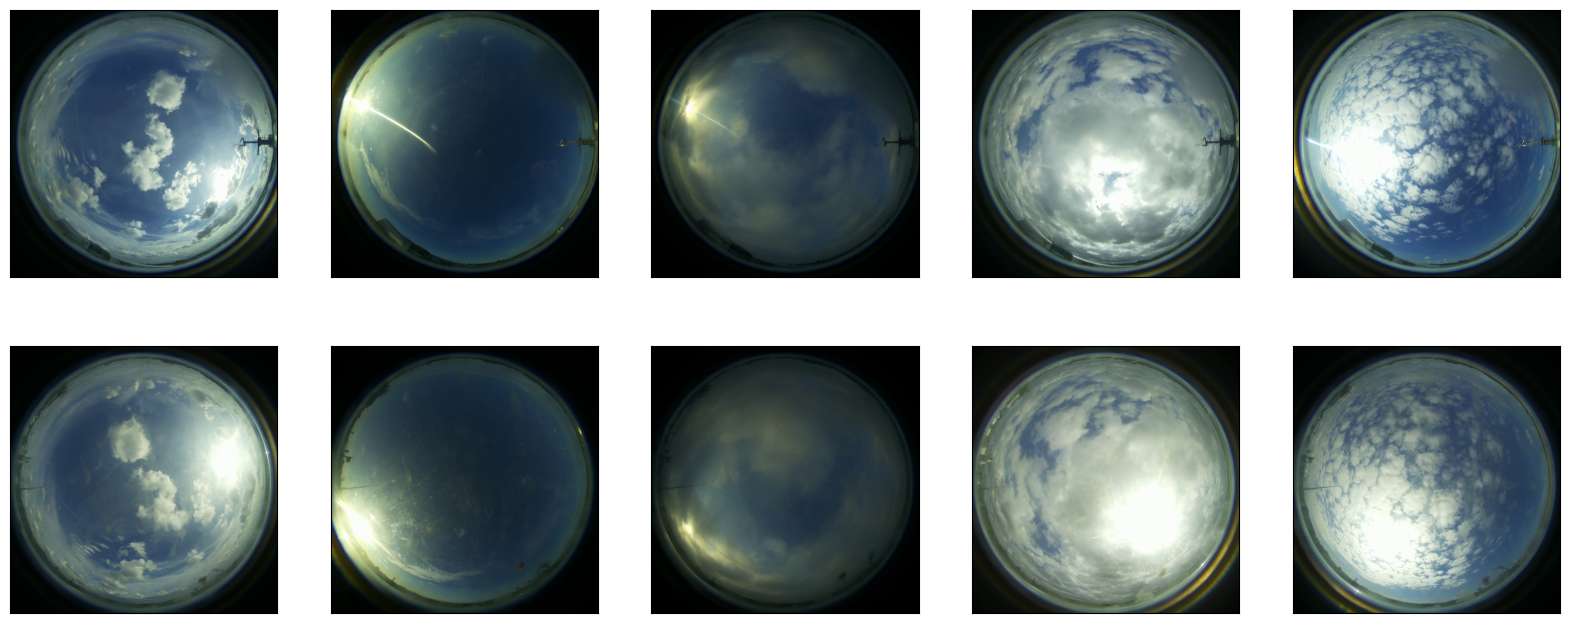

In [10]:
# Plot camera A (top row) and B (bottom row) images for unaligned fisheye images
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for axs in ax.flatten():
    axs.set_xticks([])
    axs.set_yticks([])
    
for i, rand_int in enumerate(rand_ints):
    ax[0,i].imshow(plt.imread(A_DPATH / 'imgs' / common[rand_int]))
    ax[1,i].imshow(plt.imread(B_DPATH / 'imgs' / common[rand_int]))

Plot the orientated rectified images

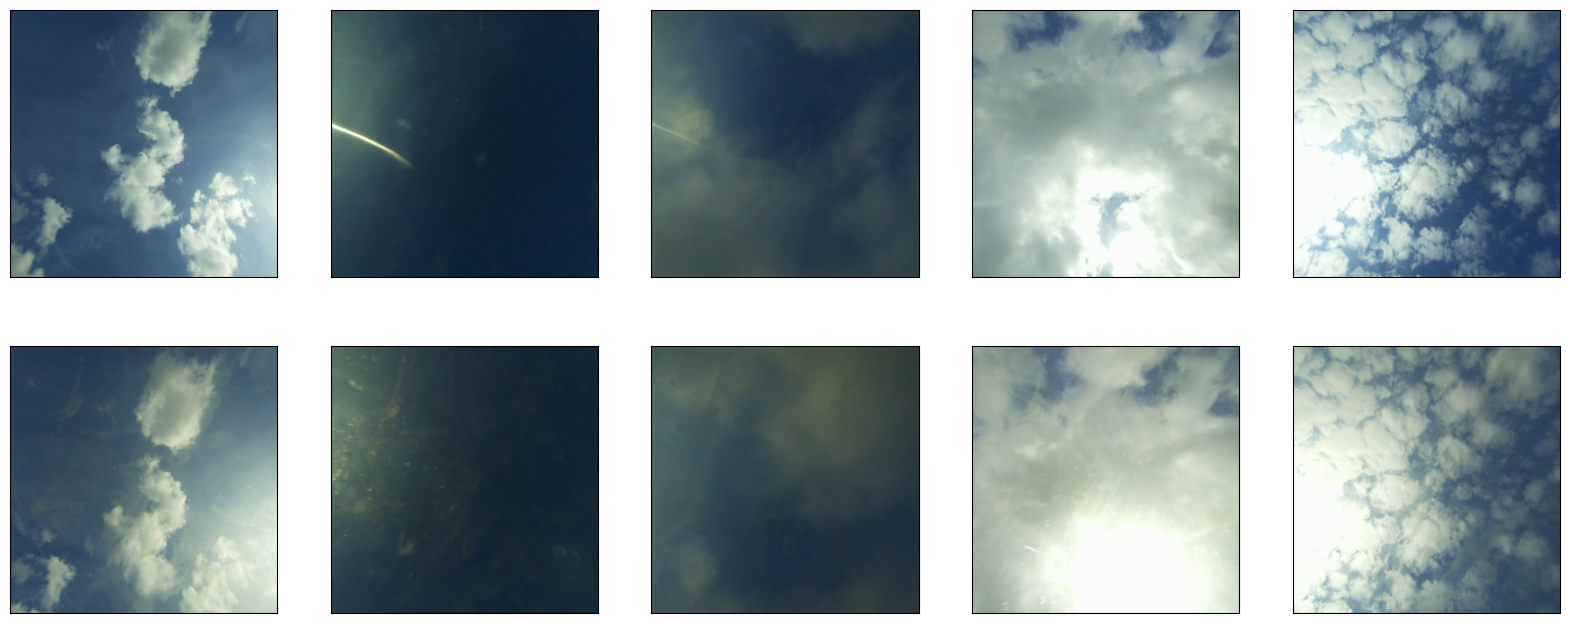

In [11]:
# Plot matched orientated camera A (top row) and B (bottom row) images
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for axs in ax.flatten():
    axs.set_xticks([])
    axs.set_yticks([])

for i, rand_int in enumerate(rand_ints):
    ax[0,i].imshow(plt.imread(A_DPATH / 'rectified_imgs' / common[rand_int]))
    ax[1,i].imshow(plt.imread(B_DPATH / 'rectified_imgs' / common[rand_int]))

Plot compressed images

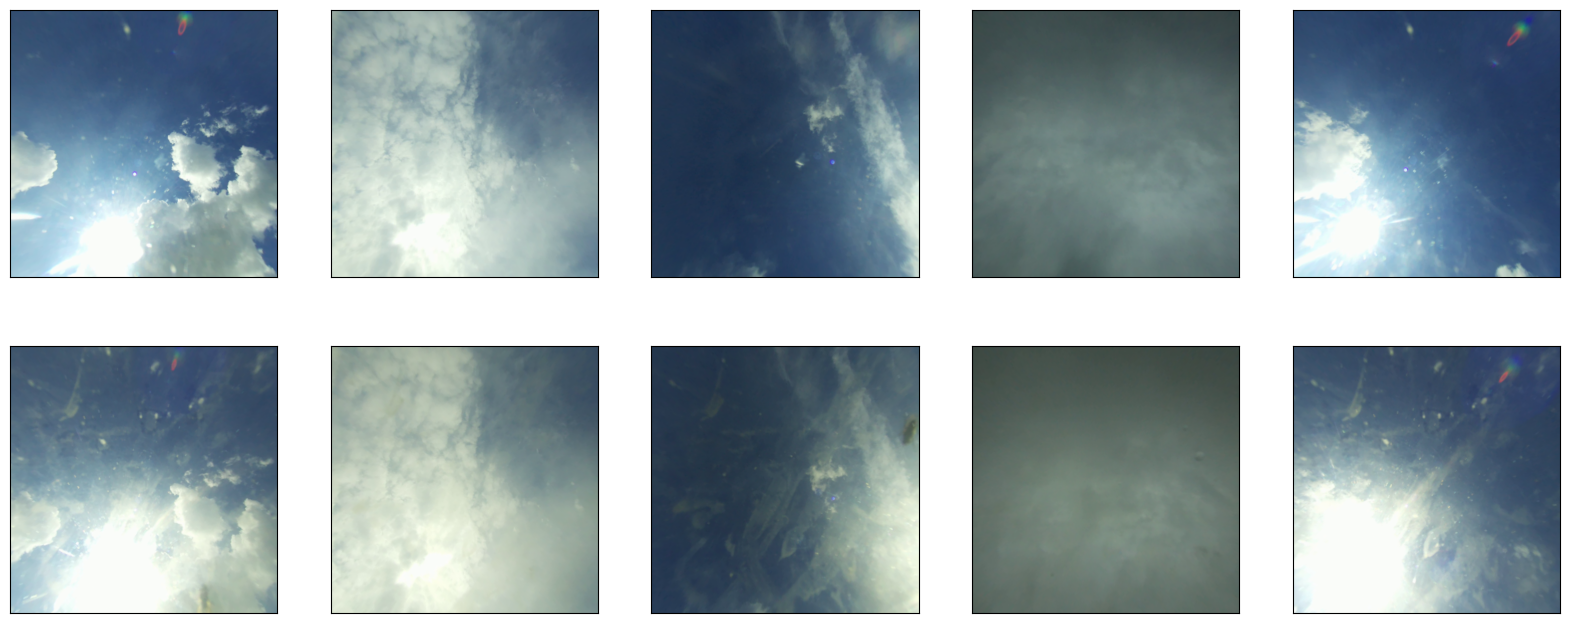

In [22]:
# Plot compressed rectified images for camera A (top row) and B (bottom row)
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for axs in ax.flatten():
    axs.set_xticks([])
    axs.set_yticks([])

for i, rand_int in enumerate(rand_ints):
    ax[0,i].imshow(plt.imread(A_DPATH / 'compressed_rectified_imgs' / common[rand_int]))
    ax[1,i].imshow(plt.imread(B_DPATH / 'compressed_rectified_imgs' / common[rand_int]))